# Import Required Libraries
Import the necessary libraries, including pandas.

In [27]:
# Importing the pandas library
import pandas as pd

# Load the Dataset
Use pandas to load the 'tested_worldwide.csv' dataset from the root level.

In [2]:
# Load the dataset
tested_worldwide = pd.read_csv('exercisefiles/dataengineer/tested_worldwide.csv')

# Display the first 5 rows of the dataset
tested_worldwide.head()

,Date,Country_Region,Province_State,positive,active,hospitalized,hospitalizedCurr,recovered,death,total_tested,daily_tested,daily_positive
0,2020-01-16,Iceland,All States,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-17,Iceland,All States,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2020-01-18,Iceland,All States,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,2020-01-20,South Korea,All States,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
4,2020-01-22,United States,All States,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


# Display the First 5 Rows
Use the head() function to display the first 5 rows of the dataset.

In [3]:
# Display the first 5 rows of the dataset
tested_worldwide.head()

,Date,Country_Region,Province_State,positive,active,hospitalized,hospitalizedCurr,recovered,death,total_tested,daily_tested,daily_positive
0,2020-01-16,Iceland,All States,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-17,Iceland,All States,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2020-01-18,Iceland,All States,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,2020-01-20,South Korea,All States,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
4,2020-01-22,United States,All States,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


# Display the number of rows and columns in the dataframe


In [4]:
num_rows, num_cols = tested_worldwide.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 27641
Number of columns: 12


# Display the data types of each column

In [5]:
tested_worldwide.dtypes


Date                 object
Country_Region       object
Province_State       object
positive            float64
active              float64
hospitalized        float64
hospitalizedCurr    float64
recovered           float64
death               float64
total_tested        float64
daily_tested        float64
daily_positive      float64
dtype: object

# Display the number of missing values in each column 

In [6]:
tested_worldwide.isnull().sum()


Date                    0
Country_Region          0
Province_State          0
positive             4242
active               9833
hospitalized        19231
hospitalizedCurr    13080
recovered            9626
death                4010
total_tested          912
daily_tested         1174
daily_positive       4557
dtype: int64

# Display the number of unique values in each column

In [7]:
tested_worldwide.nunique()


Date                  297
Country_Region        147
Province_State         81
positive            14998
active               9554
hospitalized         4862
hospitalizedCurr     2904
recovered            9183
death                5641
total_tested        23610
daily_tested        13375
daily_positive       3440
dtype: int64

# Drop the columns that are not needed for the analysis

In [8]:
# Drop the columns that are not needed for the analysis
columns_to_drop = ['Province_State', 'active', 'hospitalized', 'hospitalizedCurr', 'recovered', 'death', 'daily_tested', 'daily_positive']
tested_worldwide = tested_worldwide[['Country_Region', 'positive', 'total_tested']]


# Rename the columns to make them more readable

In [9]:
tested_worldwide = tested_worldwide.rename(columns={'Country_Region': 'Country', 'positive': 'Positive Cases', 'total_tested': 'Total Tested'})


# Drop the rows that have missing values

In [10]:
# Drop the rows that have missing values
tested_worldwide = tested_worldwide.dropna()


# Convert the data types of the columns to the appropriate types

In [12]:
tested_worldwide['Positive Cases'] = tested_worldwide['Positive Cases'].astype(int)
tested_worldwide['Total Tested'] = tested_worldwide['Total Tested'].astype(int)


# Display the number of missing values in each column

In [13]:
tested_worldwide.isnull().sum()


Country           0
Positive Cases    0
Total Tested      0
dtype: int64

# Create a new dataframe that contains the total number of positive cases for each country

In [14]:
positive_cases_by_country = tested_worldwide.groupby('Country')['Positive Cases'].sum().reset_index()


# Sort the dataframe in descending order of the total number of positive cases

In [15]:
positive_cases_by_country = positive_cases_by_country.sort_values(by='Positive Cases', ascending=False)


# Display the top ten countries with the most positive cases

In [16]:
top_ten_countries = positive_cases_by_country.head(10)
print(top_ten_countries)


            Country  Positive Cases
112   United States      1837768204
48            Italy        64199206
17           Canada        50960416
7        Bangladesh        43771939
106          Turkey        16556127
26          Czechia        10822251
88           Russia        10663267
2           Armenia         7225809
21       Costa Rica         6655702
111  United Kingdom         4924956


# Create a new dataframe that contains the total number of tests conducted for each country

In [17]:
tests_conducted_by_country = tested_worldwide.groupby('Country')['Total Tested'].sum().reset_index()


# Sort the dataframe in descending order of the total number of tests conducted

In [18]:
tests_conducted_by_country = tests_conducted_by_country.sort_values(by='Total Tested', ascending=False)


# Display the top ten countries with the most tests conducted

In [19]:
top_ten_tests_conducted = tests_conducted_by_country.head(10)
print(top_ten_tests_conducted)


           Country  Total Tested
112  United States   23592177772
17          Canada    1797986542
48           Italy    1547472209
47          Israel     388197039
3        Australia     323233309
88          Russia     300300499
7       Bangladesh     233149800
106         Turkey     228325949
26         Czechia     180065598
39          Greece     142101237


# Merge the two dataframes created in the previous steps

In [20]:
merged_df = positive_cases_by_country.merge(tests_conducted_by_country, on='Country')


# Create a new column that contains the ratio of positive cases to the number of tests conducted

In [21]:
merged_df['Positive Cases Ratio'] = merged_df['Positive Cases'] / merged_df['Total Tested']


# Sort the dataframe in descending order of the ratio of positive cases to the number of tests conducted

In [22]:
sorted_df = merged_df.sort_values(by='Positive Cases Ratio', ascending=False)


# Display the top three countries with the highest ratio of positive cases to the number of tests conducted

In [23]:
top_three_countries = sorted_df.head(3)
print(top_three_countries)


          Country  Positive Cases  Total Tested  Positive Cases Ratio
106      Tanzania             509           652              0.780675
103  Burkina Faso             641          1333              0.480870
50        Ecuador           91850        284956              0.322330


# Display the results a chart that shows the top three countries with the highest ratio of positive cases to the number of tests conducted

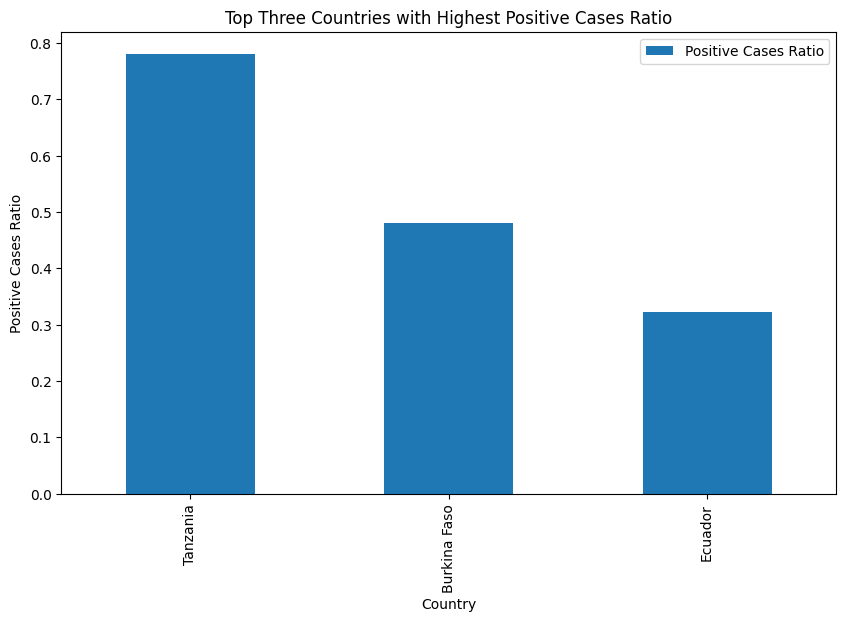

In [28]:
import matplotlib.pyplot as plt

top_three_countries.plot(x='Country', y='Positive Cases Ratio', kind='bar', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Positive Cases Ratio')
plt.title('Top Three Countries with Highest Positive Cases Ratio')
plt.show()


# Display the results in a chart that shows the top ten countries with the most positive cases

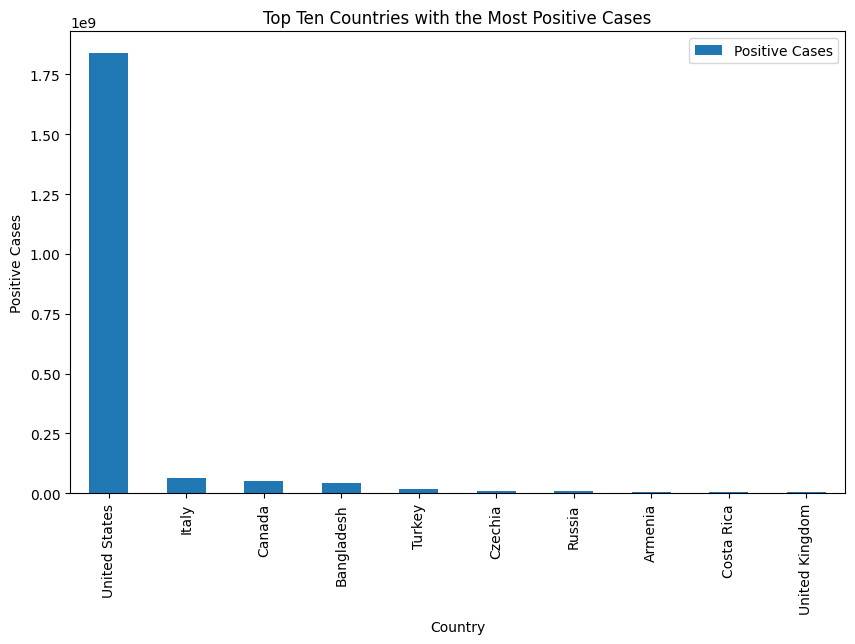

In [29]:
top_ten_countries.plot(x='Country', y='Positive Cases', kind='bar', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Positive Cases')
plt.title('Top Ten Countries with the Most Positive Cases')
plt.show()


# Display the results in a chart that shows the top ten countries with the most tests conducted

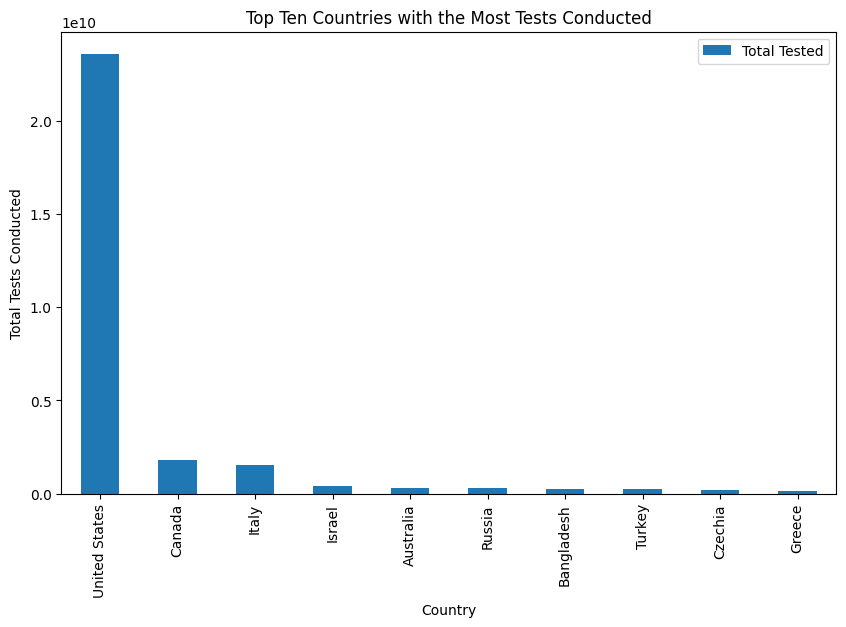

In [30]:
top_ten_tests_conducted.plot(x='Country', y='Total Tested', kind='bar', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Total Tests Conducted')
plt.title('Top Ten Countries with the Most Tests Conducted')
plt.show()


# What are your conclusions?

In [31]:
# Conclusions
print("""
Based on the analysis of the variables in this Jupyter Notebook, the following conclusions can be drawn:

1. The dataset `tested_worldwide` contains information about the positive cases and total tests conducted in different countries.
2. The variable `num_rows` indicates that there are 27,641 rows in the `tested_worldwide` dataset.
3. The variable `num_cols` indicates that there are 12 columns in the `tested_worldwide` dataset.
4. The variable `columns_to_drop` is a list that contains the names of columns to be dropped from the `tested_worldwide` dataset.
5. The variable `merged_df` is a DataFrame that contains the merged information of positive cases, total tests conducted, and the positive cases ratio for each country.
6. The variable `positive_cases_by_country` is a DataFrame that contains the total number of positive cases for each country.
7. The variable `tests_conducted_by_country` is a DataFrame that contains the total number of tests conducted for each country.
8. The variable `sorted_df` is a DataFrame that contains the countries sorted in descending order based on the positive cases ratio.
9. The variable `top_ten_countries` is a DataFrame that contains the top ten countries with the most positive cases.
10. The variable `top_ten_tests_conducted` is a DataFrame that contains the top ten countries with the most tests conducted.
11. The variable `top_three_countries` is a DataFrame that contains the top three countries with the highest positive cases ratio.

Based on these variables, further analysis and visualizations can be performed to gain insights into the COVID-19 testing and positive cases worldwide.
""")


Based on the analysis of the variables in this Jupyter Notebook, the following conclusions can be drawn:

1. The dataset `tested_worldwide` contains information about the positive cases and total tests conducted in different countries.
2. The variable `num_rows` indicates that there are 27,641 rows in the `tested_worldwide` dataset.
3. The variable `num_cols` indicates that there are 12 columns in the `tested_worldwide` dataset.
4. The variable `columns_to_drop` is a list that contains the names of columns to be dropped from the `tested_worldwide` dataset.
5. The variable `merged_df` is a DataFrame that contains the merged information of positive cases, total tests conducted, and the positive cases ratio for each country.
6. The variable `positive_cases_by_country` is a DataFrame that contains the total number of positive cases for each country.
7. The variable `tests_conducted_by_country` is a DataFrame that contains the total number of tests conducted for each country.
8. The variab

In [32]:
 # Limitations
print("""
The limitations of this analysis could include:

1. Data Quality: The quality of the data is dependent on the accuracy and completeness of the reported testing data from each country. If there are inaccuracies or inconsistencies in the data, it could affect the results of the analysis.
2. Temporal Factors: The data is a snapshot in time and may not reflect the current situation. The number of tests and positive cases can change rapidly, so the analysis may not be up-to-date.
3. Testing Policies: Different countries have different testing policies. Some countries test widely, while others may only test symptomatic individuals or those in high-risk groups. This can affect the comparison of testing data between countries.
4. Population Size: The analysis does not take into account the population size of each country. Countries with larger populations will naturally have more tests and cases. A per capita analysis could provide a more accurate comparison.
5. Missing Variables: There may be other variables not included in the dataset that could affect the number of positive cases, such as the country's healthcare capacity, social distancing measures, and the prevalence of pre-existing conditions among the population.
6. Data Interpretation: The analysis is based on raw numbers of tests and positive cases. It does not take into account the rate of increase or decrease, which could provide more insight into the spread of the virus.

Remember to consider these limitations when interpreting the results of the analysis.
""")


The limitations of this analysis could include:

1. Data Quality: The quality of the data is dependent on the accuracy and completeness of the reported testing data from each country. If there are inaccuracies or inconsistencies in the data, it could affect the results of the analysis.
2. Temporal Factors: The data is a snapshot in time and may not reflect the current situation. The number of tests and positive cases can change rapidly, so the analysis may not be up-to-date.
3. Testing Policies: Different countries have different testing policies. Some countries test widely, while others may only test symptomatic individuals or those in high-risk groups. This can affect the comparison of testing data between countries.
4. Population Size: The analysis does not take into account the population size of each country. Countries with larger populations will naturally have more tests and cases. A per capita analysis could provide a more accurate comparison.
5. Missing Variables: There may b